In [15]:
# Load the Drive helper and mount
# from google.colab import drive

# This will prompt for authorization.
# drive.mount('/content/drive')

# trainfull_data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/TFM/archive/sign_mnist_train.csv')
# test_data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/TFM/archive/sign_mnist_test.csv')

In [16]:
# import data to pandas Dataframe
import pandas as pd
import numpy as np

test_data = pd.read_csv("../mnist_sign_language/sign_mnist_test.csv")
trainfull_data = pd.read_csv("../mnist_sign_language/sign_mnist_train.csv")

In [17]:
X_train = trainfull_data.values[:, 1:].reshape(-1, 28, 28)
X_test = test_data.values[:, 1:].reshape(-1, 28, 28)

Y_train = trainfull_data.values[:, :1]
Y_test = test_data.values[:, :1]

In [18]:
X_test

array([[[149, 149, 150, ..., 150, 150, 149],
        [150, 150, 150, ..., 151, 150, 151],
        [150, 151, 151, ..., 151, 151, 152],
        ...,
        [ 69,  69,  77, ..., 116, 113, 118],
        [ 74,  75,  76, ..., 110, 116, 113],
        [ 75,  74,  74, ..., 112, 120, 107]],

       [[126, 128, 131, ..., 133, 134, 132],
        [129, 132, 134, ..., 136, 136, 134],
        [133, 135, 138, ..., 140, 139, 138],
        ...,
        [173, 174, 177, ..., 184, 182, 181],
        [172, 174, 177, ..., 184, 182, 181],
        [172, 174, 177, ..., 184, 182, 180]],

       [[ 85,  88,  92, ..., 182, 181, 178],
        [ 86,  88,  93, ..., 183, 181, 179],
        [ 86,  89,  93, ..., 185, 183, 181],
        ...,
        [ 91,  94,  97, ..., 224, 222, 221],
        [ 90,  92,  96, ..., 225, 224, 222],
        [ 89,  91,  94, ..., 225, 224, 222]],

       ...,

       [[190, 191, 190, ..., 185, 184, 183],
        [193, 193, 193, ..., 186, 185, 184],
        [195, 194, 195, ..., 187, 186, 187

In [19]:
Y_test

array([[ 6],
       [ 5],
       [10],
       ...,
       [ 2],
       [ 4],
       [ 2]])

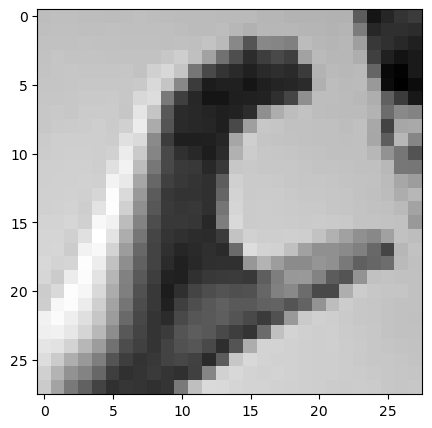

In [20]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2], cmap='gray')

In [21]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices("GPU")

for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("figure", figsize=(15,5))

IMAGE_RES_X = 28
IMAGE_RES_Y = 28

In [28]:
model_sign_recognition = keras.Sequential([
        # Input of form 28*28*1 (Just one channel of color, grayscale)
        keras.layers.Input(shape=(IMAGE_RES_X, IMAGE_RES_Y, 1)),

        # Neurons do not work with non-normalized data, son we standarized the data in a [0, 1] interval
        keras.layers.Rescaling(1./255),

        # We do a little of data augmentation, to expand our dataset
        keras.layers.RandomFlip(mode="horizontal"),
        keras.layers.RandomRotation(factor=0.1),
        keras.layers.RandomZoom(),

        # We apply BatchNormalization in order to... TODO: Understand how BatchNormalization works and
        # why it is so useful
        keras.layers.BatchNormalization(),

        # We apply some convolutions, in order to extract features from the images
        keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.Conv2D(filters=48, kernel_size=(2,2), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.Conv2D(filters=48, kernel_size=(2,2), activation='relu'),

        # Now we flatten the 3D vectors to the Dense layers, in order to make classifications
        keras.layers.Flatten(),
        keras.layers.Dense(units=96, activation='relu'),

        # In order to do not make some neurons connection-dependent from others we use the Dropout layer
        keras.layers.Dropout(0.5),

        # Now to the output layer, there are 24 classes, so we need 24 output neurons
        keras.layers.Dense(units=25, activation='softmax')
    ]
)

In [24]:
model_sign_recognition.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 28, 28, 1)         0         
                                                                 
 random_rotation_1 (RandomRo  (None, 28, 28, 1)        0         
 tation)                                                         
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 48)       

In [30]:
model_sign_recognition.compile(optimizer='Adam', 
                               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                               metrics=['accuracy'])

history = model_sign_recognition.fit(X_train, Y_train, validation_split=0.3, batch_size=32, epochs=10)

Epoch 1/10
601/601 [==============================] - 62s 100ms/step - loss: 0.2134 - accuracy: 0.9244 - val_loss: 0.0177 - val_accuracy: 0.9958
Epoch 2/10
601/601 [==============================] - 61s 101ms/step - loss: 0.1949 - accuracy: 0.9324 - val_loss: 0.0245 - val_accuracy: 0.9916
Epoch 3/10
601/601 [==============================] - 61s 101ms/step - loss: 0.1634 - accuracy: 0.9411 - val_loss: 0.0085 - val_accuracy: 0.9978
Epoch 4/10
601/601 [==============================] - 61s 102ms/step - loss: 0.1572 - accuracy: 0.9458 - val_loss: 0.0115 - val_accuracy: 0.9960
Epoch 5/10
601/601 [==============================] - 61s 101ms/step - loss: 0.1368 - accuracy: 0.9513 - val_loss: 0.0115 - val_accuracy: 0.9958
Epoch 6/10
601/601 [==============================] - 60s 100ms/step - loss: 0.1297 - accuracy: 0.9555 - val_loss: 0.0067 - val_accuracy: 0.9976
Epoch 7/10
601/601 [==============================] - 61s 102ms/step - loss: 0.1196 - accuracy: 0.9575 - val_loss: 0.0086 - val_ac

225/225 - 1s - loss: 0.1775 - accuracy: 0.9611 - 585ms/epoch - 3ms/step


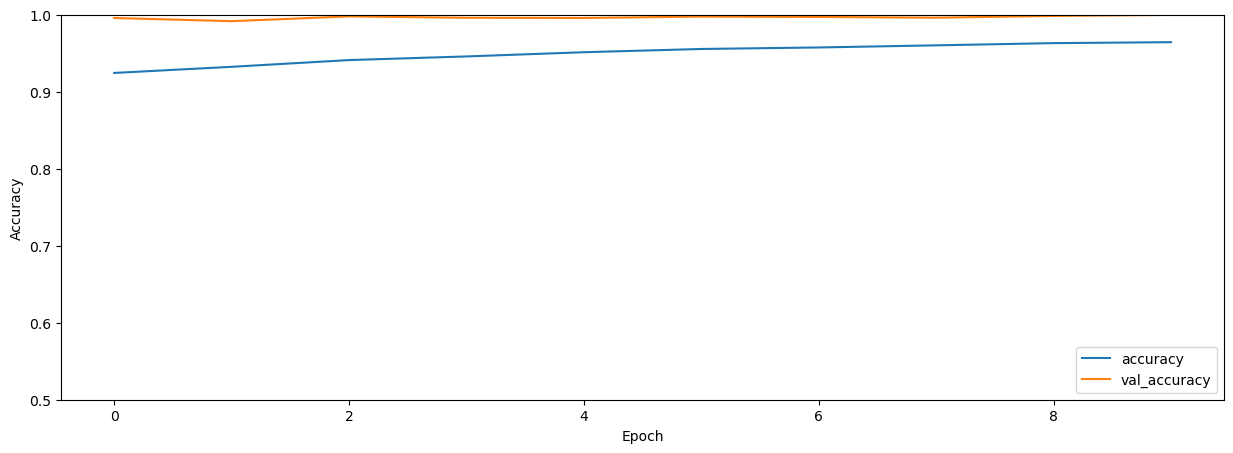

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sign_recognition.evaluate(X_test,  Y_test, verbose=2)

In [35]:
print("Test accuracy: %.2f%%" % (100 * test_acc))

Test accuracy: 96.11%


In [44]:
INDEX_TEST = 87
image_test = X_test[INDEX_TEST]

img = (np.expand_dims(image_test,0))
predict_single = model_sign_recognition.predict(img, verbose=0)

predicted_class_indices=np.argmax(predict_single,axis=1)[0]
print("Predicted: ", predicted_class_indices, "True Value: ", Y_test[INDEX_TEST])

Predicted:  17 True Value:  [17]
